<a href="https://colab.research.google.com/github/ilmare0506/DEEP-LEARNING/blob/master/09_Cat%C3%A9goriser_des_malwares_avec_un_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDENTIFICATION DE MALWARE AVEC UN CNN

## Importer les librairies

In [9]:
import tensorflow as tf

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D,Dropout,Flatten,MaxPooling2D,LeakyReLU,BatchNormalization,Rescaling
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

## Préparation des données
### Liens vers le dataset https://www.kaggle.com/keerthicheepurupalli/malimg-dataset9010/version/1

In [3]:
images_path = "/content/drive/MyDrive/DATASET/malimg_dataset/train"
train_dataset = image_dataset_from_directory(
  images_path,
  color_mode="grayscale",
  
  image_size=(64, 64),
  batch_size=64)

Found 8404 files belonging to 25 classes.


In [4]:
val_dataset = image_dataset_from_directory(
  "/content/drive/MyDrive/DATASET/malimg_dataset/validation",
  color_mode="grayscale",
  image_size=(64, 64),
  batch_size=64)

Found 935 files belonging to 25 classes.


## VISUALISATION DES DONNEES

In [5]:
import numpy as np
from PIL import Image
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    im = np.squeeze(images[i].numpy().astype("uint8"))
    plt.imshow(im,cmap='gray')
    
    plt.title(class_names[labels[i]])
    plt.axis("off")

KeyboardInterrupt: ignored

<Figure size 720x720 with 0 Axes>

In [6]:
class_names = train_dataset.class_names
num_classes = len(class_names)

## CREATION DU MODELE

In [7]:
model = Sequential([
  Rescaling(1./255, input_shape=(64, 64, 1)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)       

## ENTRAINEMENT DU MODELE

In [11]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/10
132/132 [==============================] - 1990s 15s/step - loss: 1.0132 - accuracy: 0.7035 - val_loss: 0.4735 - val_accuracy: 0.8588
Epoch 2/10
132/132 [==============================] - 24s 176ms/step - loss: 0.1978 - accuracy: 0.9457 - val_loss: 0.2847 - val_accuracy: 0.9155
Epoch 3/10
132/132 [==============================] - 24s 175ms/step - loss: 0.1345 - accuracy: 0.9624 - val_loss: 0.2742 - val_accuracy: 0.9123
Epoch 4/10
132/132 [==============================] - 24s 174ms/step - loss: 0.0977 - accuracy: 0.9687 - val_loss: 0.1884 - val_accuracy: 0.9241
Epoch 5/10
132/132 [==============================] - 24s 174ms/step - loss: 0.0756 - accuracy: 0.9742 - val_loss: 0.1532 - val_accuracy: 0.9390
Epoch 6/10
132/132 [==============================] - 24s 174ms/step - loss: 0.0506 - accuracy: 0.9845 - val_loss: 0.1269 - val_accuracy: 0.9572
Epoch 7/10
132/132 [==============================] - 25s 177ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.1630 - val_ac

## VISUALISATION DE L'APPRENTISSAGE

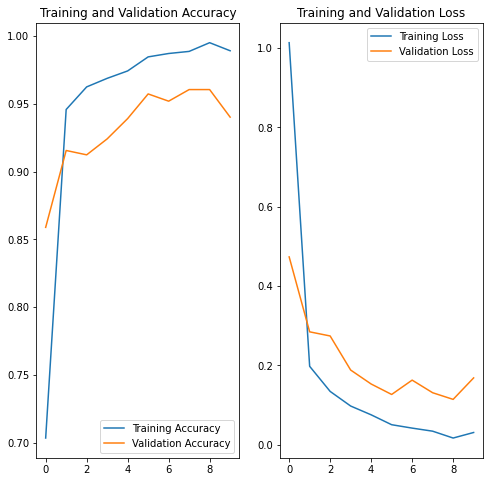

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()